In [1]:
import gensim 
import networkx as nx
import matplotlib.pyplot as plt 

In [3]:
m = 'ruscorpora_upos_skipgram_300_5_2018.vec.gz'
model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)

In [4]:
model.init_sims(replace=True)

In [18]:
transport = ['легковушка','тягач','эвакуатор','грузовик','трейлер','танк','кабриолет','такси','автобус','маршрутка','броневик',
             'спорткар','фургон','минивэн','кадиллак','поезд','электричка','самолет','вертолет','подлодка','корабль','авианосец',
             'эсминец','линкор','катер','скутер','велосипед','мотоцикл','багги', 'бензовоз', 'биплан', 'танкер', 'лодка', 'внедорожник',
             'самосвал', 'самокат', 'погрузчик', 'истребитель', 'субмарина', 'бетономешалка', 'молоковоз', 'карета', 'повозка', 
             'ракета', 'телега', 'колесница', 'комбайн', 'болид', 'санки', 'трамвай', 'трактор', 'бомбардировщик', 'вагонетка', 'вагон',
             'шхуна', 'парусник']
words = [elem + '_NOUN' for elem in transport]
print(words)

['легковушка_NOUN', 'тягач_NOUN', 'эвакуатор_NOUN', 'грузовик_NOUN', 'трейлер_NOUN', 'танк_NOUN', 'кабриолет_NOUN', 'такси_NOUN', 'автобус_NOUN', 'маршрутка_NOUN', 'броневик_NOUN', 'спорткар_NOUN', 'фургон_NOUN', 'минивэн_NOUN', 'кадиллак_NOUN', 'поезд_NOUN', 'электричка_NOUN', 'самолет_NOUN', 'вертолет_NOUN', 'подлодка_NOUN', 'корабль_NOUN', 'авианосец_NOUN', 'эсминец_NOUN', 'линкор_NOUN', 'катер_NOUN', 'скутер_NOUN', 'велосипед_NOUN', 'мотоцикл_NOUN', 'багги_NOUN', 'бензовоз_NOUN', 'биплан_NOUN', 'танкер_NOUN', 'лодка_NOUN', 'внедорожник_NOUN', 'самосвал_NOUN', 'самокат_NOUN', 'погрузчик_NOUN', 'истребитель_NOUN', 'субмарина_NOUN', 'бетономешалка_NOUN', 'молоковоз_NOUN', 'карета_NOUN', 'повозка_NOUN', 'ракета_NOUN', 'телега_NOUN', 'колесница_NOUN', 'комбайн_NOUN', 'болид_NOUN', 'санки_NOUN', 'трамвай_NOUN', 'трактор_NOUN', 'бомбардировщик_NOUN', 'вагонетка_NOUN', 'вагон_NOUN', 'шхуна_NOUN', 'парусник_NOUN']


In [19]:
def init_g(words):
    G = nx.Graph() 
    for i in range(len(words)):
        G.add_node(i+1, label=words[i])
    return G 

In [20]:
def init_edges(words, G):
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            if model.similarity(words[i], words[j]) > 0.5:      
                G.add_edge(i+1,j+1)
                print(model.similarity(words[i], words[j]))

In [21]:
G = init_g(words)
init_edges(words, G)
labels = {} #словарь для подписи графа
for i in range(len(words)):
    labels[i+1]  = words[i]

0.6170926
0.50934327
0.7221605
0.668136
0.5993683
0.52524316
0.5212345
0.5785981
0.5097819
0.5309521
0.58626527
0.6680058
0.57533884
0.6111202
0.6087066
0.55184245
0.67102736
0.6570484
0.5957345
0.52528155
0.5137705
0.56832147
0.5750796
0.57338
0.64381874
0.52376866
0.58109653
0.6049031
0.54689956
0.5559715
0.7200575
0.5172214
0.5071143
0.5059297
0.51969755
0.5166086
0.51635057
0.533636
0.71899116
0.5084312
0.53774834
0.73580307
0.5528886
0.7133636
0.525845
0.512078
0.50983363
0.5020523
0.66149175
0.67504215
0.5074219
0.6915896
0.51100004
0.53398883
0.64136076
0.6227234
0.62360764
0.5210949
0.638147
0.5641805
0.54021823
0.5345599
0.5654261
0.5859561
0.52343816
0.53051096
0.5572462
0.59067214
0.67838347
0.52401465
0.5909319
0.5685024
0.5535035
0.58169734
0.50685287
0.5671096
0.5176736
0.6009257
0.57898325
0.52070284
0.52573764
0.6133287
0.508464
0.5586413
0.6114681
0.53673166
0.6301986
0.51709646
0.57331955
0.68478215
0.59549785
0.5155134
0.5454817
0.52396154
0.59992325
0.71600735
0.562

In [22]:
# Центральность узлов (важность узлов)
print('\nЦентральность узлов по degree_centrality')
print()
deg = nx.degree_centrality(G)
max_cent = deg[sorted(deg, key=deg.get, reverse=True)[0]]
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(words[nodeid-1], deg[nodeid])

print()
print()
print()
    
print('\nЦентральность узлов по betweenness_centrality')
print()
deg2 = nx.betweenness_centrality(G)
max_cent2 = deg2[sorted(deg2, key=deg2.get, reverse=True)[0]]
for nodeid in sorted(deg2, key=deg2.get, reverse=True):
    print(words[nodeid-1], deg2[nodeid])

print()
print()
print()    

print('\nЦентральность узлов по closeness_centrality')
print()
deg3 = nx.closeness_centrality(G)
max_cent3 = deg3[sorted(deg3, key=deg3.get, reverse=True)[0]]
for nodeid in sorted(deg3, key=deg3.get, reverse=True):
    print(words[nodeid-1], deg3[nodeid])
print()
print()
print()

print('\nЦентральность узлов по eigenvector_centrality')
print()
deg4 = nx.eigenvector_centrality(G)
max_cent4 = deg[sorted(deg4, key=deg4.get, reverse=True)[0]]
for nodeid in sorted(deg4, key=deg4.get, reverse=True):
    print(words[nodeid-1], deg4[nodeid])


Центральность узлов по degree_centrality

грузовик_NOUN 0.4727272727272727
бензовоз_NOUN 0.36363636363636365
трейлер_NOUN 0.34545454545454546
автобус_NOUN 0.32727272727272727
тягач_NOUN 0.3090909090909091
легковушка_NOUN 0.2909090909090909
самолет_NOUN 0.2909090909090909
мотоцикл_NOUN 0.2909090909090909
молоковоз_NOUN 0.2909090909090909
вертолет_NOUN 0.2545454545454545
внедорожник_NOUN 0.2545454545454545
самосвал_NOUN 0.2545454545454545
погрузчик_NOUN 0.2545454545454545
субмарина_NOUN 0.2545454545454545
трактор_NOUN 0.2545454545454545
кадиллак_NOUN 0.23636363636363636
авианосец_NOUN 0.23636363636363636
эсминец_NOUN 0.23636363636363636
танкер_NOUN 0.23636363636363636
танк_NOUN 0.19999999999999998
фургон_NOUN 0.19999999999999998
катер_NOUN 0.19999999999999998
подлодка_NOUN 0.18181818181818182
корабль_NOUN 0.18181818181818182
бетономешалка_NOUN 0.18181818181818182
бомбардировщик_NOUN 0.18181818181818182
парусник_NOUN 0.18181818181818182
спорткар_NOUN 0.16363636363636364
линкор_NOUN 0.163

In [23]:
print('\nСредняя кластеризация')
print(nx.average_clustering(G))
print('\nКоэффициент кластеризации')
print(nx.transitivity(G))
print('\nКоэффициент ассортативности')
print(nx.degree_assortativity_coefficient(G))
print('\nРадиус')
print(nx.radius(G))
print('\nДиаметр')
print(nx.diameter(G))
print('\nПлотность')
print(nx.density(G))


Средняя кластеризация
0.6787420799506158

Коэффициент кластеризации
0.5791109729561703

Коэффициент ассортативности
0.16609486289153194

Радиус
3

Диаметр
5

Плотность
0.18246753246753247


In [24]:
from networkx.algorithms import community

print('\nСообщества')
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))


#from networkx.algorithms.centrality import community

#com = nx.community.greedy_modularity_communities(G)
#print(com)

# У нас получилось 3 сообщества


Сообщества


[[1,
  2,
  3,
  4,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  26,
  27,
  28,
  29,
  30,
  34,
  35,
  36,
  37,
  40,
  41,
  47,
  48,
  50,
  51,
  53,
  54],
 [6, 18, 19, 20, 21, 22, 23, 24, 25, 31, 32, 33, 38, 39, 44, 52, 55, 56],
 [42, 43, 45, 46, 49]]

In [25]:
print('Количество соседей узлов')
for node in G.nodes():
    print(node, G.degree(node))

Количество соседей узлов
1 16
2 17
3 7
4 26
5 19
6 11
7 4
8 7
9 18
10 6
11 4
12 9
13 11
14 8
15 13
16 5
17 6
18 16
19 14
20 10
21 10
22 13
23 13
24 9
25 11
26 9
27 4
28 16
29 5
30 20
31 4
32 13
33 8
34 14
35 14
36 4
37 14
38 9
39 14
40 10
41 16
42 6
43 6
44 6
45 6
46 3
47 5
48 3
49 5
50 7
51 14
52 10
53 8
54 7
55 9
56 10


In [26]:
oops1 = []
oops2 = []
oops3 = []

oops1.append(next_level_communities[0])
oops2.append(next_level_communities[1])
oops3.append(next_level_communities[2])

print(oops1)
print(oops2)
print(oops3)

[{1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 26, 27, 28, 29, 30, 34, 35, 36, 37, 40, 41, 47, 48, 50, 51, 53, 54}]
[{32, 33, 38, 6, 39, 44, 18, 19, 52, 20, 22, 23, 56, 25, 21, 55, 24, 31}]
[{42, 43, 45, 46, 49}]


In [27]:
# число узлов и рёбер

print(G.number_of_nodes())
print(G.number_of_edges())

56
281


In [28]:
lis1 = []
lis2 = []

for nodeid in sorted(deg4, key=deg4.get, reverse=True):
    lis1.append(words[nodeid-1])
    lis2.append(deg4[nodeid])

In [29]:
print(lis1)

print(lis2)

['грузовик_NOUN', 'бензовоз_NOUN', 'трейлер_NOUN', 'тягач_NOUN', 'молоковоз_NOUN', 'легковушка_NOUN', 'автобус_NOUN', 'самосвал_NOUN', 'трактор_NOUN', 'мотоцикл_NOUN', 'погрузчик_NOUN', 'самолет_NOUN', 'кадиллак_NOUN', 'внедорожник_NOUN', 'бетономешалка_NOUN', 'вертолет_NOUN', 'танк_NOUN', 'фургон_NOUN', 'вагонетка_NOUN', 'эвакуатор_NOUN', 'такси_NOUN', 'скутер_NOUN', 'комбайн_NOUN', 'бомбардировщик_NOUN', 'танкер_NOUN', 'спорткар_NOUN', 'минивэн_NOUN', 'вагон_NOUN', 'броневик_NOUN', 'субмарина_NOUN', 'авианосец_NOUN', 'трамвай_NOUN', 'истребитель_NOUN', 'эсминец_NOUN', 'маршрутка_NOUN', 'поезд_NOUN', 'ракета_NOUN', 'катер_NOUN', 'багги_NOUN', 'электричка_NOUN', 'повозка_NOUN', 'телега_NOUN', 'парусник_NOUN', 'подлодка_NOUN', 'корабль_NOUN', 'линкор_NOUN', 'биплан_NOUN', 'кабриолет_NOUN', 'шхуна_NOUN', 'лодка_NOUN', 'велосипед_NOUN', 'самокат_NOUN', 'болид_NOUN', 'карета_NOUN', 'санки_NOUN', 'колесница_NOUN']
[0.3144789096440107, 0.2843221983903872, 0.28209898917453474, 0.2551560385281

График №1
314.4789096440107
284.3221983903872
282.0989891745347
255.1560385281264
240.77146857918416
232.89000271071518
228.79652534692596
226.65207863526945
221.61804212061793
219.7966004437897
195.6957697417071
178.9130428140225
178.88523515843912
168.34938098336636
167.42649623689877
146.67044965754283
145.99643466562608
145.14245591511897
132.27854417377358
118.31442738489812
84.4694558223557
83.86170951889062
81.91517358089749
80.55789255751974
79.98668026935103
77.87779665579284
75.54951021759567
73.50250933539591
71.05533051076301
70.16123695688873
69.35471085491544
64.12073657384929
62.77580456327554
59.939516091388334
58.331888713918886
54.16879119862602
51.26043207022503
47.703233788528756
46.852262795606286
42.20439899967412
40.452988168019196
40.452988168019196
37.48151292302837
37.48151292302836
37.48151292302836
35.37794845768818
35.12785928233224
33.408822934046114
32.64793546813035
30.18226111613649
25.51647121600356
25.51647121600356
24.104759274947902
20.8649370320412

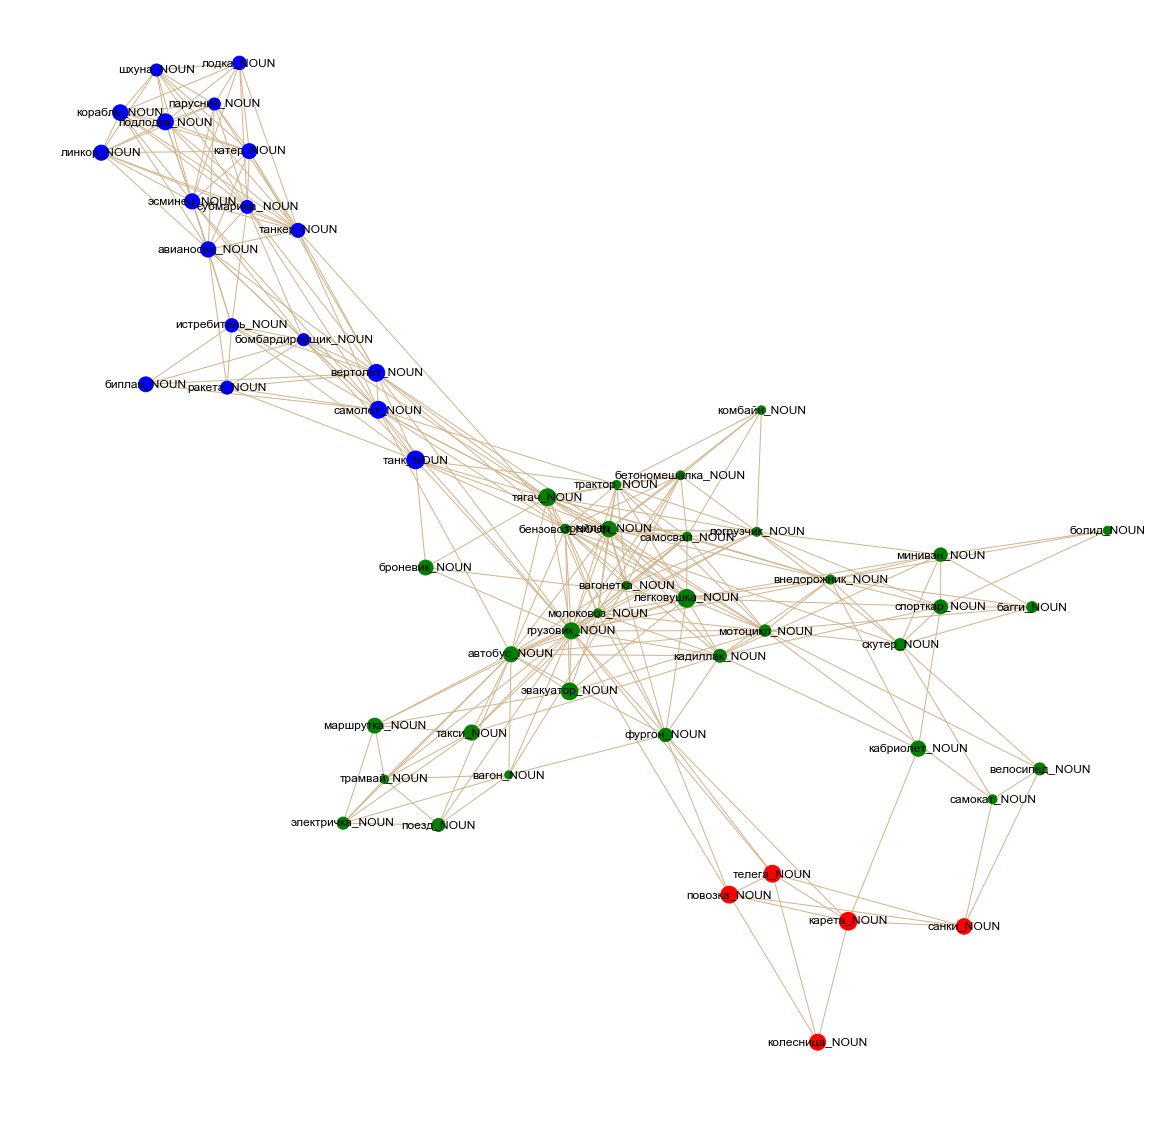

In [30]:
print('График №1')
pos=nx.spring_layout(G)

node_size = [i * 1000 for i in lis2]

for i in node_size:
    print(i)

print(node_size)

plt.figure(figsize = (20, 20))
nx.draw_networkx_nodes(G, pos, nodelist = sorted(*oops1), node_size = node_size, node_color ='green')# if [o in oops2 for o in next_level_communities] else 'blue')
nx.draw_networkx_nodes(G, pos, nodelist = sorted(*oops2), node_size = node_size, node_color ='blue')# if [o in oops2 for o in next_level_communities] else 'blue')
nx.draw_networkx_nodes(G, pos, nodelist = sorted(*oops3), node_size = node_size, node_color ='red')# if [o in oops2 for o in next_level_communities] else 'blue')
nx.draw_networkx_edges(G, pos, edge_color = 'tan') 
plt.axis('off')
nx.draw_networkx_labels(G, pos, font_size = 12,font_family='Arial', labels = labels)
plt.savefig('graph1.png',dpi = 200)
plt.show()
nx.write_gexf(G, 'graph_file.gexf')

# От центральности узлов по eigenvector_centrality зависит размер узла.
# Зелёные узлы принадлежат первому сообществу.
# Синие - второму.
# А красные - третьему.

In [126]:
# Можно сделать предположение, что разбиение на сообщества привело к возникновению трёх классов:
# Важность узла была определена методом degree centrality - из слова "грузовик" исходит больше всего узлов
# 1) Наземный транспорт;
# 2) Воздушный и морской виды транспорта (но слово "танк" должно принадлежать первому сообществу по вышеописанной причине, но ввиду присутствия военной техники во втором сообществе танк попадает во второе сообщество);
# 3) Старинные виды транспорта
# Слово "Грузовик" имеет наибольшее количество узлов. Следовательно, оно является наиболее важным звеном во всём графике.
# Это может быть связано с тем, что многие наземные виды транспорта (бензовоз, тягач) подразумевают машину, везущую определённый груз - а слово "грузовик" является обобщающим понятием для многих из них.